#**Proyecto Final:** **Modelo neuronal de Hindmarsh-Rose (HR)**

> Análisis del modelo y solución del sistema de ecuaciones por el método Runge-Kutta de orden 4.

**Quinto semestre. Física Biomédica.**

*Nombre:* Ana Belen Sanvicente Méndez

*Profesor:* Ricardo Méndez Fragoso

*Asignatura:* Física Computacional.



 Recuperado de https://es.dreamstime.com/illustration/braincells.html


Los modelos para representar el comportamiento neuronal han evolucionado a lo largo de la historia y se han desarrollado métodos matemáticos más complejos para su estudio.
En este trabajo se realizó un análisis profundo del modelo neuronal de Hindmarsh-Rose, así como un tratamiento cuantitativo de su comportamiento, la obtención de las soluciones del sistema de ecuaciones diferenciales y el análisis de los planos fase y el sistema HR. 

Este modelo es un derivado del modelo de Hodgkin-Huxley y de Fitzhugh-Nagumo. Estos modelos (así como otros modelos diversos propuestos), tienen como objetivo representar la forma en que se comportan las neuronas y son reconocidos por la capacidad que tienen de hacerlo realísticamente. El modelo de Hindmarsh-Rose fue generado de tal forma que se puede analizar más fácilmente que el modelo HH debido a que es más simple. Entre otras ventajas, es mencionado que el modelo de Hindmarsh-Rose tiene dos puntos más de equilibrio comparado con el modelo de Fitzhugh-Nagumo. Más tarde los resultados obtenidos por HR fueron respaldados en neuronas de moluscos.


Los puntos de equilibrio se obtine con el potencial en reposo, es decir, cuando I = 0 y la corriente efectiva a la que es sometida la neurona es I − z.

Su deducción se basa en el comportamiento global de la neurona, y está construido tridimensionalmente, teniendo como base una sistema fast-slow. Este sistema quiere decir que se tienen dos variables rápidas y una lenta, la cual está completamente controlada por el parámetro μ, quien se encarga de controlar la escala de tiempo de adaptación.

En el año de 1982 Hindmarsh y Rose propusieron las dos primeras ecuaciones del sistema y dos años más tarde agregaron la tercera ecuación, dando como resultado el siguiente sistema de ecuaciones diferenciales ordinarias no lineales: 

(1) $$ \frac{dx}{dt} = a y + b x^2 − c x^3 − d z + I $$

(2) $$ \frac{dy}{dt} = e − f x^2 − y$$

(3) $$ \frac{dz}{dt} = µ (S (x + h) − z)$$

Donde a, b, c, d, e, f, I, S, μ y h son constantes.

* La ecuación (1) plantea el cambio de potencial.

* La ecuación (2) plantea el cambio de la velocidad de los iones transportados a través de canales rápidos.

* La ecuación (3) plantea el cambio de la magnitud de la corriente de adaptación.


I es la corriente que se le suministra a la neurona, r  controla la escala de tiempo de la adaptación neuronal, etc.

Entre sus aplicaciones tenemos Sincronización de una red de neuronas electrónicas HR utilizando acoplamientos dinámicos, el cual es importante en el funcionamiento de generadores de patrones centrales robustos, la transmisión de códigos neuronales, neuropatologías y el estudio del bursting. 

El bursting es un interesante fenómeno que consiste en una actividad que realizan las neuronas que sirve para codificar información [3]. Se pueden notar activaciones de patrones en neuronal del SNC y medula espinal.

En este trabajo se reprodujo la visualización de dos configuraciones del Bursting: Plateau-Like bursting y Square-wave Bursting.




Por otro lado, el código del método de Runge-Kutta de cuarto orden se contruyó en clase a partir de la siguiente serie de cálculos:

$$ \vec x_{n+1} = \vec x_n + \frac{1}{6} \delta (k_1 + 2k_2 + 2k_3 + k_4)$$

$$ t_{n+1} = t_n + \delta $$

$$ \vec k_1 = \vec g (\vec x_n , t_n)$$

$$ \vec k_2 = \vec g (\vec x_n + \delta \frac{\vec k_1}{2}, t_n + \frac{\delta}{2})$$

$$ \vec k_3 = \vec g (\vec x_n + \delta \frac{\vec k_2}{2}, t_n + \frac{\delta}{2})$$

$$ \vec k_4 = \vec g (\vec x_n + \delta \vec k_3, t_n + \delta)$$

#Objetivos

*   Obtener las soluciones del sistema de ecuaciones por el método de Runge Kutta de cuarto orden, usando los valores típicos neuronales.
*   Analizar las gráficas de las soluciones y los planos fase del comportamiento neuronal de neuronas del SNC.
*  Estudio del modelo HR en Bursting.




# Desarrollo

 


> Coeficientes típicos neuronales:

a = 1. Es un número real que ayuda conmutar entre “bursting“ y “spiking“. 

b = 3.

c = 1.

d = 0.99.

e = 1.01.

f = 5.0128.

μ = 0.0021.

S = 3.966.

h = 1.605. También llamado $x_0$ en ocasiones, que representa el punto más estable sin corriente de adaptación.

I = 3.024.






> Condiciones iniciales: Fueron obtenidas a partir de la literatura, utilizando los vaores típicos neuronales.






Código implementado en Python para las simulaciones:

In [ ]:
# Librerías utilizadas:
from pylab import *
import matplotlib.pyplot as plt


In [ ]:
# Funciones utilizadas:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

In [ ]:
def ec_4(t,x):
  # x es (x,y,z)
  dx = x[1] + 3*x[0]**2 - x[0]**3 - 0.99*x[2] + 2.5
  dy = 1.01 - 5.0128*x[0]**2 - x[1]
  dz = 0.0021*(3.966*(x[0] + 1.605) - x[2])
  return array([dx,dy,dz])

In [ ]:
ci = (-1.7,-9.8, 2.3)
sol = RK4(ec_4,(1,1500),ci)

#Resultados

Potencial de membrana x(t)

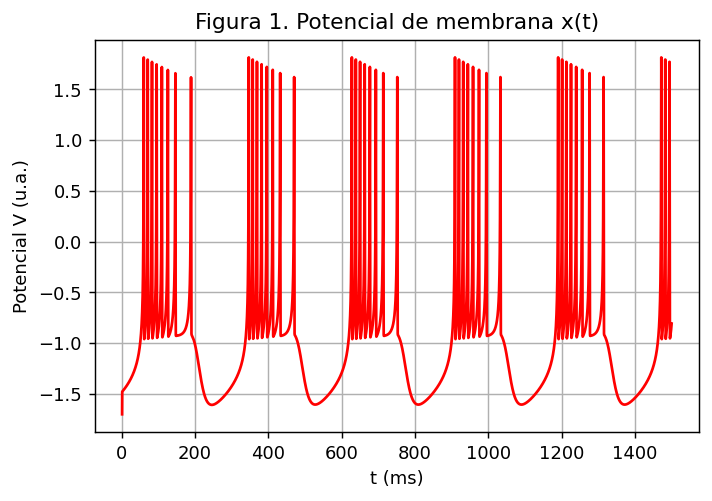

In [ ]:
figure(dpi=130)
plot(sol[0],sol[1][0],color = 'red')
title('Figura 1. Potencial de membrana x(t)')
xlabel('t (ms)')
ylabel('Potencial V (u.a.)')
grid()


En la **Figura 1** se observan grupos discretos de ráfagas de potencial también conocidos como "spikes", separados por momentos de reposo. Esta es la primer variable de comportamiento rápido del sistema.

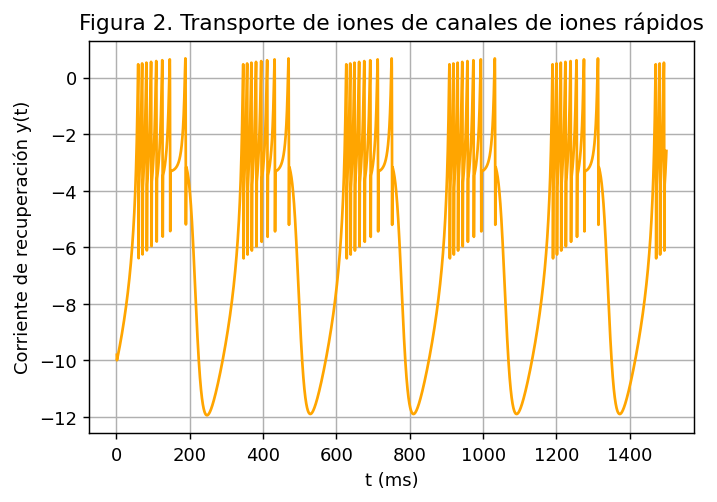

In [ ]:
figure(dpi=130)
plot(sol[0],sol[1][1],color = 'orange')
title('Figura 2. Transporte de iones de canales de iones rápidos')
ylabel('Corriente de recuperación y(t)')
xlabel('t (ms)')
grid()

**Figura 2.** Comportamiento variable y.

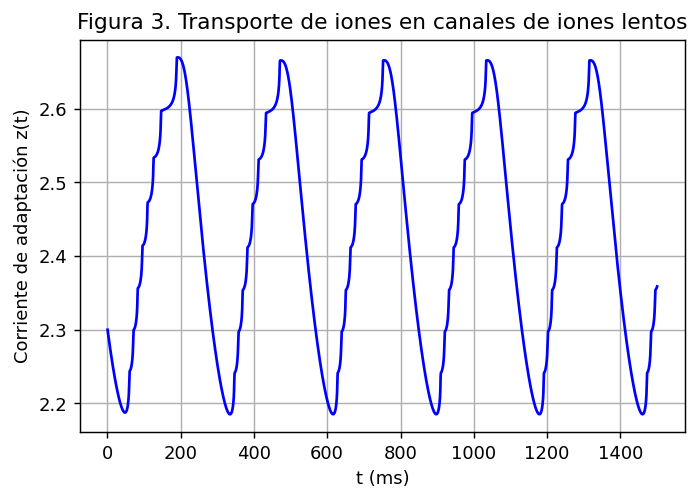

In [ ]:
figure(dpi=130)
plot(sol[0],sol[1][2],color = 'blue')
title('Figura 3. Transporte de iones en canales de iones lentos')
ylabel('Corriente de adaptación z(t)')
xlabel('t (ms)')
grid()

**Figura 3.** Comportamiento lento de z.

Text(0.5, 1.0, 'Figura 3.1. Comparacion')

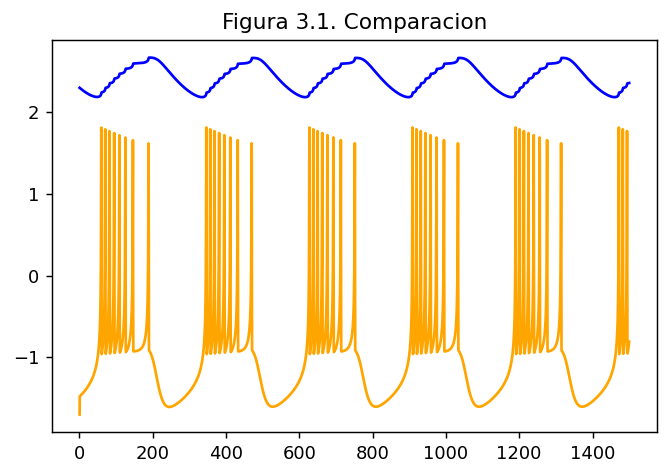

In [ ]:
figure(dpi=130)
plot(sol[0],sol[1][0],color = 'orange')
plot(sol[0],sol[1][2],color = 'blue')
title('Figura 3.1. Comparación x(t) y z(t)')


**Figura 3.1** Cuando aumenta z, los puntos de equilibrio estables desaparecen y provocan ciclos de límite en el bursting.

##Planos fase

Plano XY

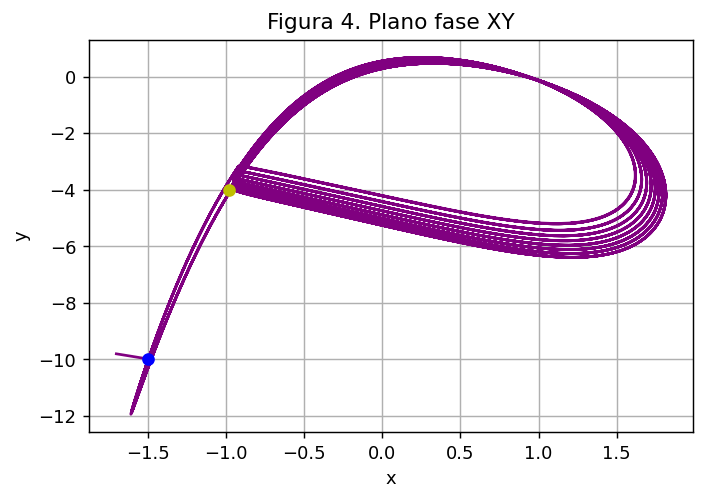

In [ ]:
figure(dpi=130)
plot(sol[1][0],sol[1][1],color = 'purple')
title('Figura 4. Plano fase XY')
plot(-1.5,-10,'bo')
plot(-0.98,-4,'yo')
xlabel('x')
ylabel('y')
grid()

**Figura 4.** Espacio de fases con punto silla en amarillo y punto de equilibrio en azul.

Plano ZX

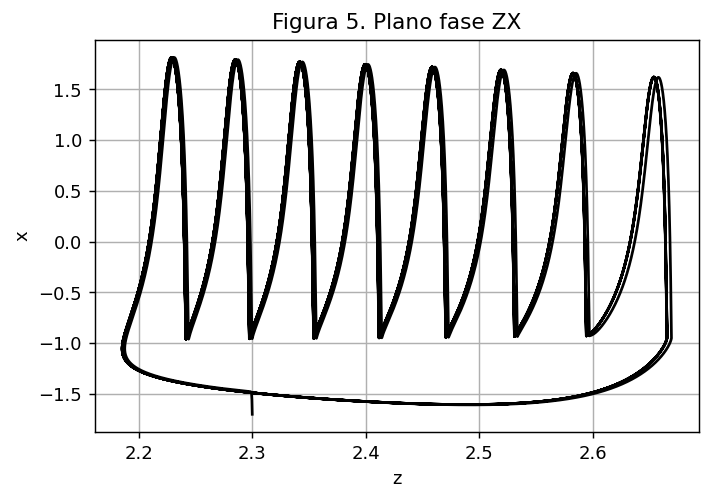

In [ ]:
figure(dpi=130)
plot(sol[1][2],sol[1][0],color = 'black')
title('Figura 5. Plano fase ZX')
xlabel('z')
ylabel('x')
grid()

**Figura 5.** : Diagrama asociado al subsistema rápido del “Square-Wave bursting”.

Plano ZY

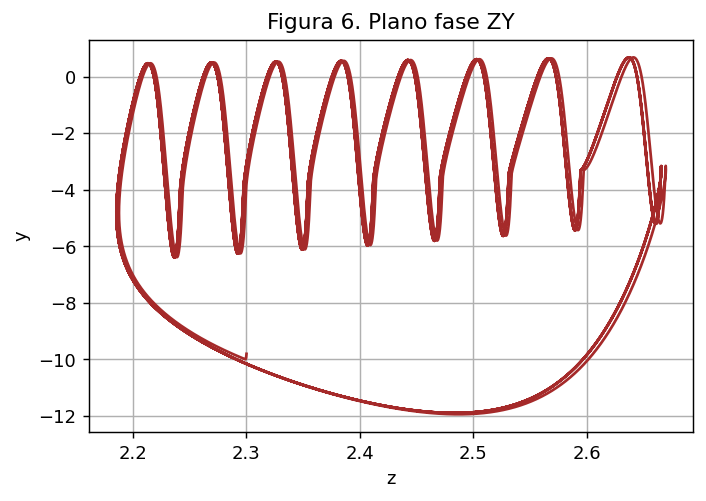

In [ ]:
figure(dpi=130)
plot(sol[1][2],sol[1][1],color = 'brown')
title('Figura 6. Plano fase ZY')
xlabel('z')
ylabel('y')
grid()

**Figura 6.** Diagrama asociado al subsistema rápido del “Plateau-Like bursting”

Text(0.5, 0, 'y')

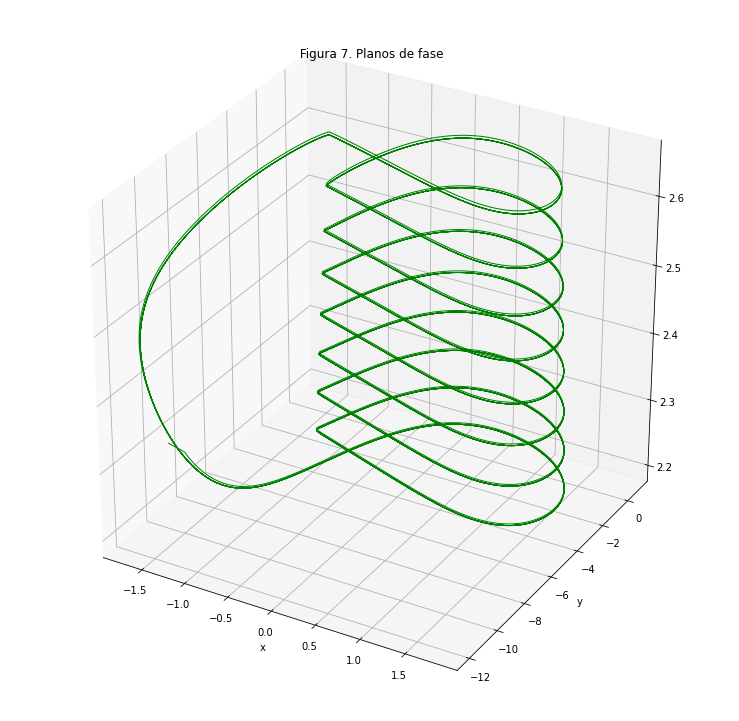

In [ ]:
fig = plt.figure()
ax = fig.gca(projection ='3d')
fig.set_size_inches(13, 13)
ax.plot(sol[1][0],sol[1][1],sol[1][2],lw = 1, color = 'green')
ax.set_title(" Figura 7. Planos de fase")
plt.xlabel('x')
plt.ylabel('y')

**Figura 7.** Soluciones en tres dimensiones.

#Conclusiones

Se cumplió el objetivo de analizar a profundidad este modelo HR.
Se logró obtener resultados utilizando la función de Runge-Kutta de 4to orden para hallar las soluciones del sistema de ecuaciones.
Se logró visualizar el fenómeno de bursting utilizando los valores de una neurona típica.